In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('csv/auto-mpg.csv', header = 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [4]:
data = df[['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']]
target = df['mpg']

In [5]:
data.head()

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70


In [6]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.8038056886711227
0.8189127648525054


In [11]:
y_predict = lr.predict(test_input)
print(y_predict)

[12.60498148 24.99403822 11.74516735 20.85868011 17.62080819 28.82272553
 31.90992664 24.9164586  13.24194831 28.02726861 34.05205648 32.61158545
 21.29764721 26.49317179 16.22056495 32.24140262 30.16771391 30.00257886
 17.81649806 30.77912307 15.22256869 25.71639658 25.58093087 20.15039513
 30.78222772 26.79163259 32.27411359 32.05861282 30.48240529 18.22890018
 21.246199   29.71006569 20.91858157 30.92641878 24.36487243 23.88864084
 21.48231553 16.69751997 32.02667686  7.95890323  9.45370848 13.76695319
 27.34954023 29.10909489 29.58785956 22.67575388 23.22624163 13.71496623
 23.87553671 28.22439239 31.48865722 26.80916588 15.2916879  25.11420884
 14.58277947  9.49989223 19.62832211 26.8484052  31.36193572 14.89471478
 20.70068711 25.64737347 22.45225496 19.74492573 10.713155   11.35480172
  9.57217931 19.70254075 25.08478292  9.53964266 33.41858099 10.14271696
 20.96912979 19.31534232 22.53251911 29.39503373 29.10518572 28.69994468
 29.85301884 16.13086894]


In [12]:
print(np.round(lr.coef_, decimals=2), np.round(lr.intercept_, decimals = 2))

[-0.17  0.01 -0.01  0.21  0.76] -17.35


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_target, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, y_predict)

print(f'mse: {np.round(mse, decimals=3)}, rmse: {np.round(rmse, decimals=3)}')
print(f'R^2: {np.round(r2, decimals = 3)}')

mse: 11.491, rmse: 3.39
R^2: 0.819


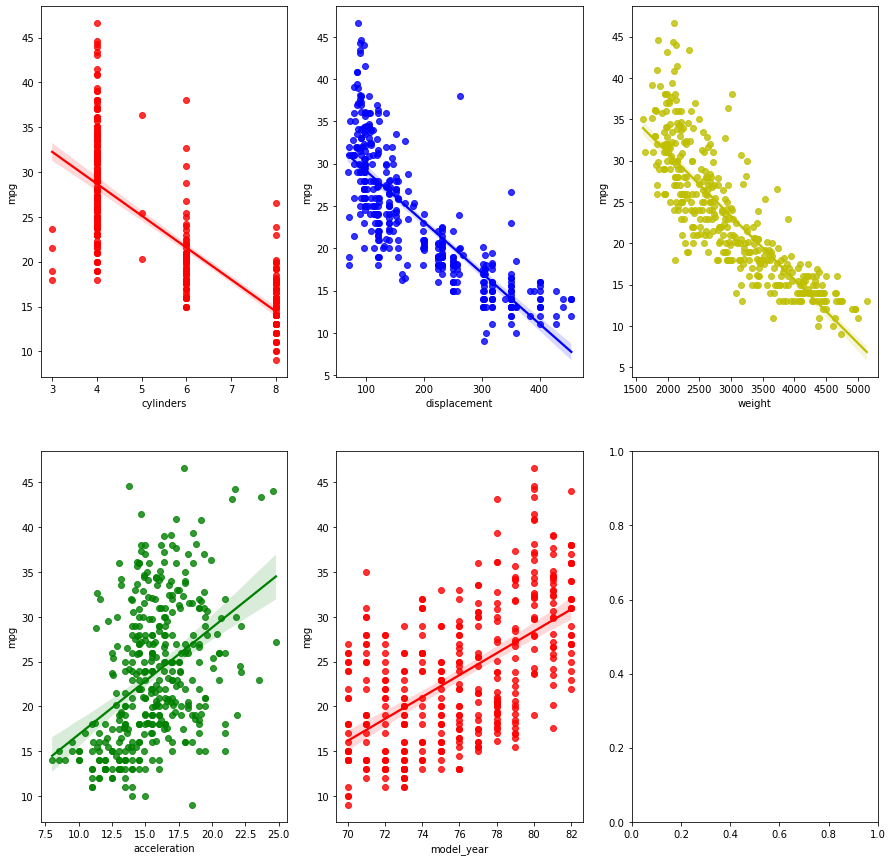

In [32]:
ax1, ax2= plt.subplots(figsize = (15,15), ncols =3, nrows =2)
x_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y="mpg", data = df, ax=ax2[row][col], color=plot_color[i])
plt.show()

In [38]:
cylinder_test = int(input("실린더 개수를 입력하시오"))
displacement_test = float(input("배기량을 입력하시오"))
weight_test = int(input("무게를 입력하시오"))
acceleration_test = float(input("가속도를 입력하시오"))
model_year_test = int(input("연도를 입력하시오"))

mpg_predict = lr.predict([[cylinder_test, displacement_test, weight_test, acceleration_test, model_year_test]])
print()
print(f'이 자동차의 연비는 {np.round(mpg_predict, 2)} 입니다.')

실린더 개수를 입력하시오 6
배기량을 입력하시오 310
무게를 입력하시오 3400
가속도를 입력하시오 11.5
연도를 입력하시오 70



이 자동차의 연비는 [15.82] 입니다.
